In [ ]:
# |default_exp llm

In [ ]:
# |export

from dotenv import load_dotenv, find_dotenv
import os


def load_env():
    _ = load_dotenv(find_dotenv())


def get_gemini_api_key():
    load_env()
    gemini_api_key = os.getenv("GEMINI_API_KEY")
    return gemini_api_key


def get_openai_api_key():
    load_env()
    openai_api_key = os.getenv("OPENAI_API_KEY")
    return openai_api_key


def get_google_projectID():
    load_env()
    google_projectID = os.getenv("GOOGLE_PROJECT_ID")
    return google_projectID


def get_google_auth_file():
    load_env()
    google_auth_file = os.getenv("GOOGLE_AUTH_FILE")
    return google_auth_file


def get_azure_openai_keys():
    load_env()
    azure_api_key = os.getenv("AZURE_API_KEY")
    azure_endpoint = os.getenv("AZURE_ENDPOINT")
    azure_api_version = os.getenv("AZURE_API_VERSION")
    return azure_api_key, azure_endpoint, azure_api_version

In [ ]:
gem_key = get_gemini_api_key()

# get azure openai

In [ ]:
import nest_asyncio

nest_asyncio.apply()

In [ ]:
# |export

from llama_index.llms.azure_openai import AzureOpenAI
from llama_index.embeddings.azure_openai import AzureOpenAIEmbedding
from llama_index.core import Settings


def get_azure_llm(engine="gpt-4o"):
    AZURE_API_KEY, AZURE_ENDPOINT, AZURE_API_VERSION = get_azure_openai_keys()
    llm = AzureOpenAI(
        engine=engine,
        api_key=AZURE_API_KEY,
        azure_endpoint=AZURE_ENDPOINT,
        api_version=AZURE_API_VERSION,
    )
    Settings.llm = llm
    return llm

In [ ]:
llm = get_azure_llm()
response = llm.complete("Paul Graham is ")
print(response)

Paul Graham is a well-known computer scientist, entrepreneur, and venture capitalist. He is best known for co-founding Viaweb, one of the first web-based applications, which was later acquired by Yahoo and became Yahoo Store. Additionally, he is a co-founder of Y Combinator, a highly influential startup accelerator that has funded and mentored numerous successful startups, including Dropbox, Airbnb, and Reddit. Graham is also an accomplished writer, having authored several essays on programming, startups, and other topics, which have been widely read and respected in the tech community.


# get gemini llm

In [ ]:
# |export

import google.generativeai as genai


def get_gemini_llm(model="gemini-1.5-flash"):
    genai.configure(api_key=get_gemini_api_key())
    llm = genai.GenerativeModel(model)
    return llm

In [ ]:
llm = get_gemini_llm()
response = llm.generate_content("Explain how AI works")
print(response.text[:100])

Artificial intelligence (AI) doesn't work in a single, unified way.  Instead, it's a broad field enc


# get gemini llamaindex llm

In [ ]:
# |export

from llama_index.llms.gemini import Gemini
from llama_index.core import Settings


def get_gemini_llamaindex_llm(model="models/gemini-1.5-flash"):
    genai.configure(api_key=get_gemini_api_key())
    llm = Gemini(model=model, api_key=get_gemini_api_key())
    Settings.llm = llm
    return llm

In [ ]:
llm = get_gemini_llamaindex_llm()
resp = llm.complete("Write a poem about a magic backpack")
print(resp)

A backpack worn, of leather deep,
With stitching strange, secrets to keep.
No ordinary pack is this,
But holds a world of wondrous bliss.

A whispered word, a touch so light,
And forth it springs, a dazzling sight.
A shimmering stream, a verdant wood,
A castle grand, misunderstood.

A tiny dragon, scales of gold,
A story spun, a tale untold.
A feathered quill, a parchment scroll,
To chart the stars, and reach a goal.

It holds the sun, a pocket bright,
And moonbeams soft, for darkest night.
A compass true, that never strays,
Through winding paths and hidden ways.

But heed the warning, whispered low,
Its magic power, starts to grow.
With every wish, a price you pay,
So choose your wants with care today.

For in this pack, both joy and fear,
A boundless realm, both far and near.
A magic backpack, old and wise,
Reflecting dreams in its deep guise.



# get vertex (gemini llamaindex) llm

In [ ]:
# |export

from llama_index.core import Settings
from llama_index.llms.vertex import Vertex
from google.oauth2 import service_account


def get_vertex_llm(model="gemini-1.5-flash-001"):

    # Set up necessary variables
    credentials = {
        "project_id": get_google_projectID(),
        "api_key": get_gemini_api_key(),
    }

    # filename = get_google_auth_file()
    # credentials_service: service_account.Credentials = (
    #     service_account.Credentials.from_service_account_file(filename)
    # )

    # Create an instance of the Vertex class
    llm = Vertex(
        model=model,
        project=credentials["project_id"],
        credentials=credentials,
        context_window=100000,
    )
    # llm = Vertex(
    #     model=model,
    #     project=credentials_service.project_id,
    #     credentials=credentials_service,
    #     context_window=100000,    )
    Settings.llm = llm
    return llm

In [ ]:
llm = get_vertex_llm()

# fail error 503
# 503 Getting metadata from plugin failed with error: 'dict' object has no attribute 'before_request'.
# llm.complete("Write a poem about a magic backpack")

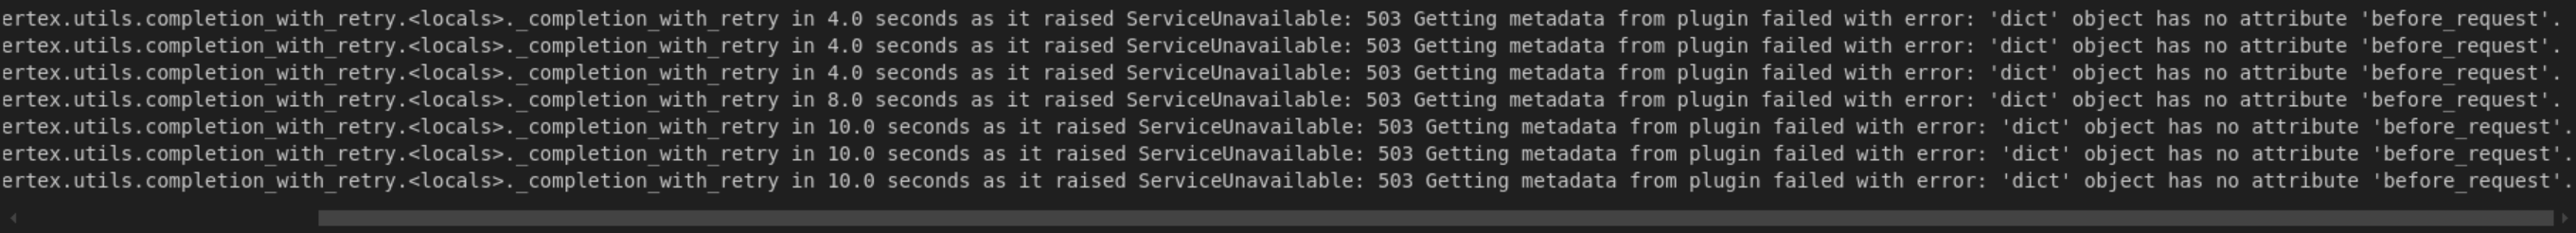

In [ ]:
import vertexai
from vertexai.generative_models import GenerativeModel

vertexai.init(project=get_google_projectID(), location="us-central1")

model = GenerativeModel("gemini-1.5-flash-001")

response = model.generate_content(
    "What's a good name for a flower shop that specializes in selling bouquets of dried flowers?"
)

print(response.text)

ServiceUnavailable: 503 Getting metadata from plugin failed with error: 'dict' object has no attribute 'before_request'

# py code generation

In [ ]:
from nbdev.export import nb_export

nb_export("py llm helper.ipynb", ".")